# Exploratory Data Analysis of Titanic Survivers

## EDA of Titanic Datasets

In [1]:
# importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
# Check for empty sets
train.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

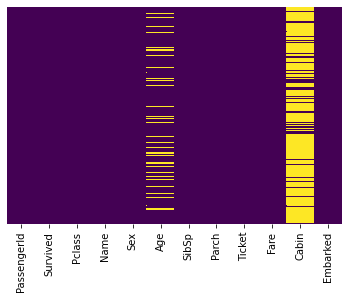

In [7]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

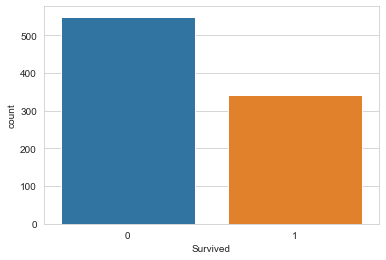

In [9]:
sns.set_style('whitegrid')
sns.countplot('Survived', data=train)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

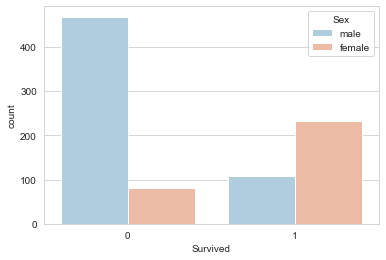

In [14]:
# For Specific data display 
sns.set_style('whitegrid')
sns.countplot('Survived', hue='Sex', data=train, palette='RdBu_r')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

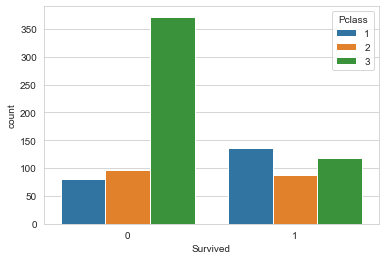

In [16]:
# Checking Survived w.r.t the Pclass
sns.set_style('whitegrid')
sns.countplot('Survived', hue='Pclass', data=train)

<AxesSubplot:xlabel='Age', ylabel='Density'>

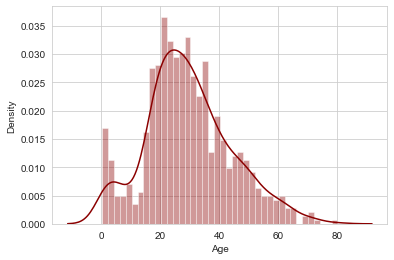

In [19]:
# w.r.t Age
sns.set_style('whitegrid')
sns.distplot(train['Age'], kde=True, color='darkred', bins=40)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

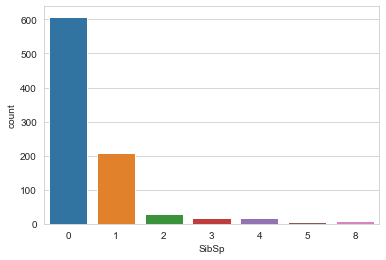

In [20]:
sns.countplot(x='SibSp', data=train)

## Data Cleaning

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

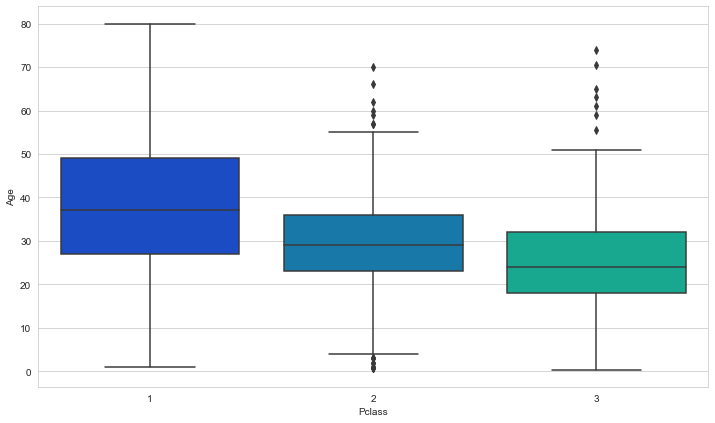

In [21]:
# To find the Average Age
plt.figure(figsize = (12,7))
sns.boxplot(x='Pclass', y='Age', data=train, palette='winter')

In [29]:
# From the Graph we get to Know that Avg ages 1 = 37, 2 = 29, 3 = 24
# Create a Function to fill the avg age in null place
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [30]:
train['Age'] = train[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

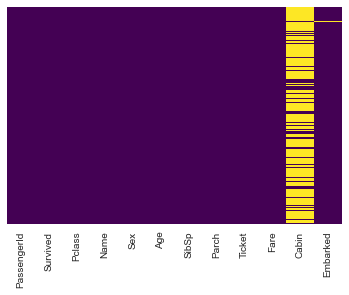

In [33]:
# Check for Empty Datasets in Age
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [34]:
# Drop the Cabin
train.drop('Cabin', axis=1, inplace=True)

<AxesSubplot:>

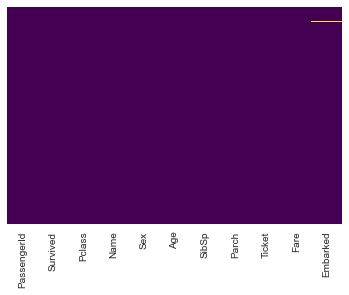

In [36]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [37]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


## Converting Categorial Features

In [38]:
pd.get_dummies(train['Embarked'], drop_first=True).head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [39]:
sex = pd.get_dummies(train['Embarked'], drop_first=True)
Embark = pd.get_dummies(train['Sex'], drop_first=True)

In [40]:
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [41]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [43]:
# Embbed the Sex and Embark to Train
train = pd.concat([sex, Embark, train], axis=1)

In [44]:
train.head()

,Q,S,male,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,1,1,1,0,3,22.0,1,0,7.2500
1,0,0,0,2,1,1,38.0,1,0,71.2833
2,0,1,0,3,1,3,26.0,0,0,7.9250
3,0,1,0,4,1,1,35.0,1,0,53.1000
4,0,1,1,5,0,3,35.0,0,0,8.0500


## Logistic Regression Model

In [46]:
train.drop('Survived', axis=1).head()

,Q,S,male,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,1,1,1,3,22.0,1,0,7.2500
1,0,0,0,2,1,38.0,1,0,71.2833
2,0,1,0,3,3,26.0,0,0,7.9250
3,0,1,0,4,1,35.0,1,0,53.1000
4,0,1,1,5,3,35.0,0,0,8.0500


In [47]:
train['Survived'].head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived', axis=1), train['Survived'],test_size=0.30, random_state=101)

### Training and Prediction

In [106]:
from sklearn.linear_model import LogisticRegression

In [109]:
logmodel = LogisticRegression(solver='lbfgs', max_iter=1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [110]:
prediction = logmodel.predict(X_test)

In [111]:
from sklearn.metrics import confusion_matrix

In [112]:
accuracy = confusion_matrix(y_test, prediction)

In [113]:
accuracy

array([[134,  20],
       [ 37,  77]], dtype=int64)

In [114]:
from sklearn.metrics import accuracy_score

In [115]:
accuracy = accuracy_score(y_test, prediction)

In [116]:
accuracy

0.7873134328358209

In [117]:
prediction

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)